In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.32


In [3]:
def build(robot):
    box1=Box(robot,x=3,y=9.5,name="right")
    box2=Box(robot,x=3,y=11.5,name="left")

    connect(box1,box2,"weld")

    disk1=Disk(robot,x=2,y=10.5,name="center")

    connect(disk1,box1,"distance")
    connect(disk1,box2,"distance")


In [10]:
def act(t,robot):

    color=robot['center'].read_color()
    
    if t<0.5:
        robot['right'].F=2
        robot['left'].F=2
    else:
        robot['right'].F=0
        robot['left'].F=0

    robot.message=color



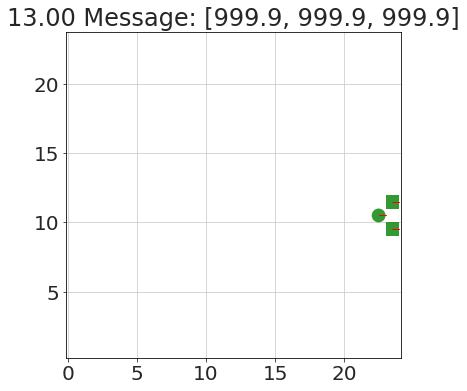

In [11]:
env=Environment(24,24)
robot=Robot(env)
build(robot)

run_sim(env,act,
        figure_width=6,
       total_time=13,
       dt_display=0.3,  # make this larger for a faster display
       )


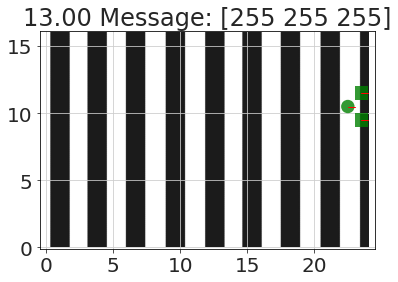

In [12]:
env=Environment(image='images/stripes1.jpg')
robot=Robot(env)
build(robot)

run_sim(env,act,
        figure_width=6,
       total_time=13,
       dt_display=0.3,  # make this larger for a faster display
       )


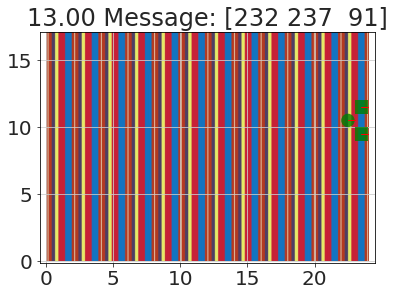

In [8]:
env=Environment(image='images/stripes2.jpg')
robot=Robot(env)
build(robot)

run_sim(env,act,
        figure_width=6,
       total_time=13,
       dt_display=0.3,  # make this larger for a faster display
       )


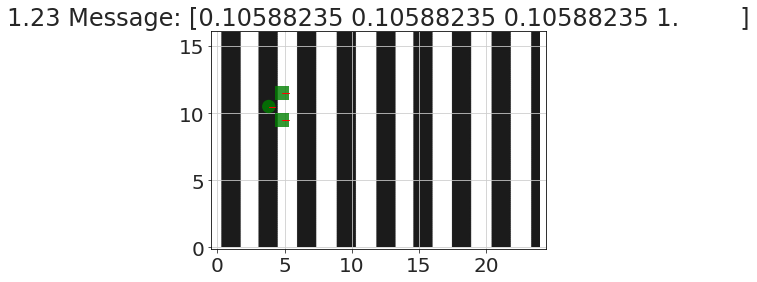

In [16]:
env=Environment(image='images/stripes3.png')
robot=Robot(env)
build(robot)

run_sim(env,act,
        figure_width=6,
       total_time=13,
       dt_display=0.3,  # make this larger for a faster display
       )


In [17]:
color=robot['center'].read_color()

In [18]:
color

array([0.10588235, 0.10588235, 0.10588235, 1.        ], dtype=float32)

In [19]:
r,g,b,a=color

In [20]:
r

0.105882354

In [23]:
g

0.105882354

In [24]:
b

0.105882354

In [25]:
a

1.0

In [26]:
if b>.75 and g<0.1 and r<.1:
    print("blue!")

In [41]:
def isblue(r,g,b):
    if b>.75 and g<0.4 and r<.3:  # blue!
        return True
    else:
        return False

In [ ]:
def online(r,g,b):
    if r<.2 and g<.2 and b<.2:
        return True
    else:
        return False

In [42]:
def act(t,robot):

    color=robot['center'].read_color()
    r,g,b,a=color  # assuming I'm reading a png
    # r,g,b=color  # assuming I'm reading a jpg
    
    
    if isblue(r,g,b):
        robot['right'].F=-1
        robot['left'].F=-1
    else:
        robot['right'].F=.2
        robot['left'].F=.2


    robot.message=color



In [43]:
def act(t,robot):

    color_left=robot['left'].read_color()
    color_right=robot['right'].read_color()
    rl,gl,bl,al=color_left  # assuming I'm reading a png
    rr,gr,br,ar=color_right  # assuming I'm reading a png
    # r,g,b=color  # assuming I'm reading a jpg
    
    
    if isblue(rl,gl,bl) or isblue(rr,gr,br):
        robot['right'].F=-1
        robot['left'].F=-1
    else:
        robot['right'].F=.2
        robot['left'].F=.2


    robot.message=color



In [ ]:
def act(t,robot):

    color_left=robot['left'].read_color()
    color_right=robot['right'].read_color()
    rl,gl,bl,al=color_left  # assuming I'm reading a png
    rr,gr,br,ar=color_right  # assuming I'm reading a png
    # r,g,b=color  # assuming I'm reading a jpg
    
    
    if online(rl,gl,bl) and not online(rr,gr,br):
        robot['right'].F=-1
        robot['left'].F=-1
    elif not online(rl,gl,bl) and online(rr,gr,br):
    else:
        robot['right'].F=.2
        robot['left'].F=.2


    robot.message=color



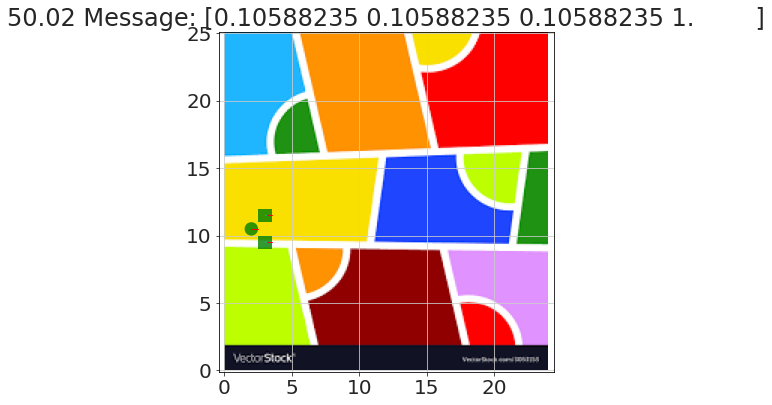

In [44]:
env=Environment(image='images/colors.png')
robot=Robot(env)
build(robot)

run_sim(env,act,
        figure_width=6,
       total_time=50,
       dt_display=0.3,  # make this larger for a faster display
       )
